# Dynamics of Discrete Maps: Logistic Map

In this tutorial, we demonstrate the following:
1. Finding fixed points and analyzing stability, mathematically
2. Generating the map for a given value of parameter, r
3. Different regimes of dynamics as r is varied
4. Plotting the bifurcation diagram
5. Observing SICness in the system for chaotic regime

## 1. Fixed points and their stability

$F(x,r) = x_{n+1} = r x_{n}(1-x_{n})$

#### 1.1 Find fixed points as function of r
Solve the equation $x^{*} = rx^{*}(1-x^{*})$ , for $x^{*}$

Answer: $x^{*} = 0;\; x^{*} = 1-\frac{1}{r}$

#### 1.2 Analyze Stability
Check $|F'(x^{*})|$

If $|F'(x^{*})|$>1 , unstable (repeller)

If $|F'(x^{*})|$<1 , stable (attractor)

Answer:
$|F'(x^{*})| = \left | \frac{d}{dx}(F(x^{*})) \right |$
         = $|r(1-2x^{*})|$


$|F'(0)| = r$ 

since r is positive, this is stable for r<1

$|F'(1-\frac{1}{r})| = |2-r|$

this is stable for 1<r<3

## 2. Generate Logistic Map for a given parameter value

In [5]:
###############import packages#################
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
#parameters
iterations = 1000 #iterations
r = 4

In [7]:
#the logistic map equation
def logistic(x,r):
    x = r * x * (1 - x)
    return x

In [17]:
x0 = np.linspace(0, 1, 1000) #a set of evenly spaced initial conditions
xn = logistic(x0,r)

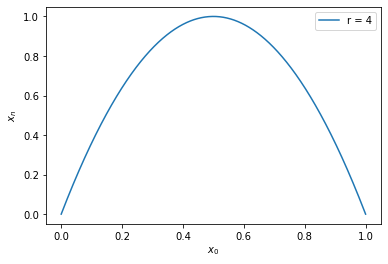

In [18]:
#Plot the map
plt.figure()
plt.plot(x0, xn, label = 'r = '+str(r))
plt.xlabel(r'$x_{0}$')
plt.ylabel(r'$x_{n}$')
plt.legend()

## 3. Dynamics of the system for varying r

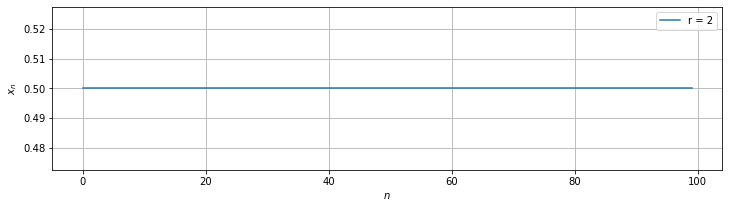

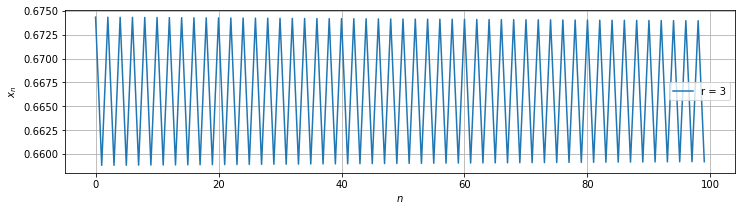

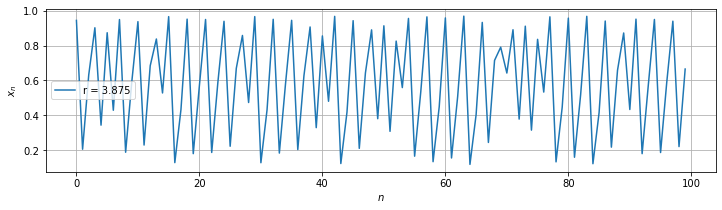

In [39]:
r_values = [2,3,3.875] #try for different values of r and see

for r in r_values:
    plt.figure().set_size_inches(12,3)
    x_n = np.random.rand(1) #initialize with a random initial value
    x_values = [x_n,] #to store x values
    
    for i in range(iterations):
        x_n = logistic(x_n,r)
        x_values.append(x_n)

    plt.plot(x_values[-100:],label = 'r = '+str(r))

    plt.xlabel(r'$n$')
    plt.ylabel(r'$x_{n}$')
    plt.grid()
    plt.legend()
    plt.show()


#### Can you find the value of r where 2-cycle bifurcates to 4-cycle, upto 3 decimal points?
Hint: at a 2-cycle fixed point, $x(n+2) = x(n) = x^{*}$

To round a given number in python: 

x = round(x,4)
will round to 4 decimal points etc.

In [40]:
## write your code here

## 4. Bifurcation Diagram

To see how the system behaves as parameter r changes, we plot the bifurcation diagram.

Main idea: for different values of r, iterate the system for a long time and get $x^{*}$. Plot $x^{*}$ vs r.

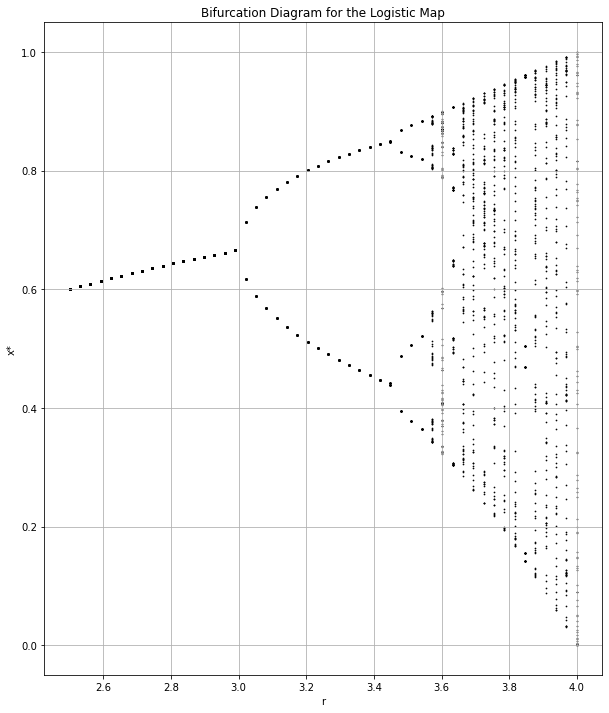

In [47]:
plt.figure().set_size_inches(12,8)
plt.title('Bifurcation Diagram for the Logistic Map')

#generates 1000 evenly spaced values between 2.5 and 4.0
r_values = np.linspace(2.5, 4.0, 1000) 

for r in r_values:
    xn = np.random.rand(1)
    for i in range(iterations):
        x_n = logistic(x_n,r)
        
        #for plotting the last 100
        if i>(iterations-100):
            plt.scatter(r,x_n,color='k',s=0.5)

plt.xlabel('r')
plt.ylabel('x*')
plt.grid()

## 5. SICness in Chaotic Regime

We take two initial conditions, very close to each other and observe how the respective trajectories evolve.

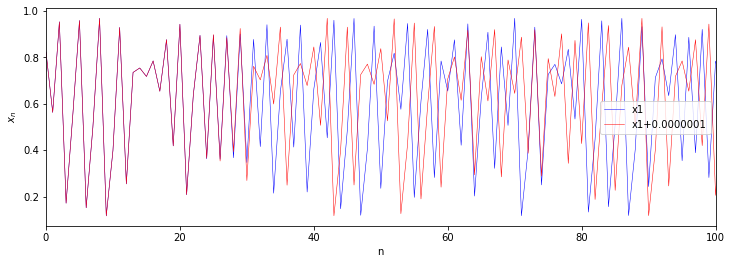

In [44]:
r = 3.876 #for chaotic

x1 = np.random.rand(1)
x2 = x1+0.0000001 #the second differs from first by only 0.0000001

xn1 = [] #to store x values as system evolves
xn2 = []
for i in range(iterations):
    xn1.append(x1)
    xn2.append(x2)
    x1 = logistic(x1,r)
    x2 = logistic(x2,r)

plt.figure().set_size_inches(12,4)
plt.plot(xn1,color='b',label=r'x1',linewidth=0.5)
plt.plot(xn2,color='r',label='x1+0.0000001',linewidth=0.5)
plt.xlim(0,100)
plt.xlabel(r'n')
plt.ylabel(r'$x_{n}$')
plt.legend()